# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [18]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [26]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [8]:
#function

In [27]:
print df_raw.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is a larger numerical value as compared to GPA with a larger mean. GRE is at a higher scale than GPA. A standard deviation of 116 on GRE implies that 68% of the data points for GRE lie within +/- 116 of the mean value ( ie 588 ). A standard deviation of 0.38 on the GPA indicates that 68% of the data points for gpa lie within +/- 0.38 of the mean ( ie 3.39 ).

#### Question 4. Drop data points with missing data


In [71]:
df = df_raw[np.isfinite(df_raw['gre'])]
df = df[np.isfinite(df['gpa'])]
df = df[np.isfinite(df['prestige'])]
df = df[np.isfinite(df['admit'])]
## check to see if the above can be achieved in one statement
print df_raw.describe() ## original dataframe
print df_raw.isnull().values.any()
#print df_raw.isnull().sum() # is a bit slower, has additional information -- the number of NaNs
print df.describe() ## new dataframe after removing records with null values
print df.isnull().values.any()
print df.isnull().sum() 


            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000
True
            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000
False
admit       0
gre         

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Comparing the old and new dataframes using the .isnull().values.any()  as described above

#### Question 6. Create box plots for GRE and GPA

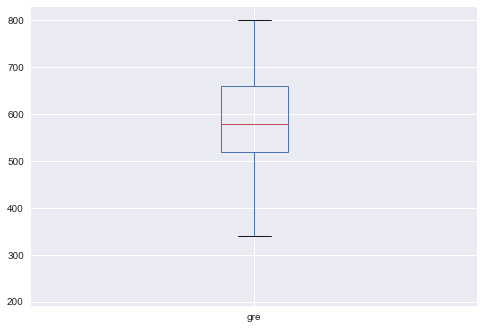

In [36]:
#boxplot 1
df['gre'].plot(kind="box")

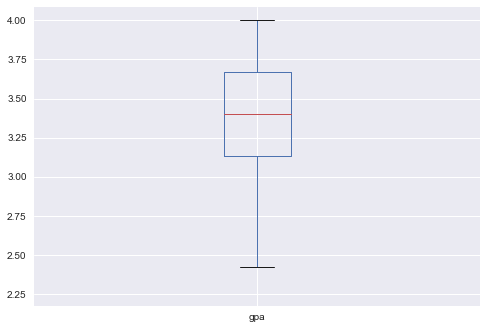

In [35]:
#boxplot 2 
df['gpa'].plot(kind="box")

#### Question 7. What do this plots show?

Answer: The plots show the min, 25% ( first quartile ) , 50% ( median ) , 75% ( third quartile ) , max values.

#### Question 8. Describe each distribution 

Axes(0.125,0.125;0.775x0.755)


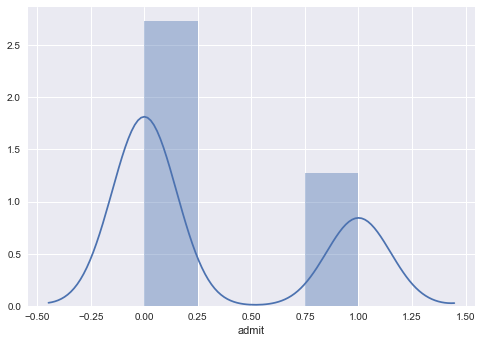

In [47]:
# plot the distribution of each variable 

sns.set(color_codes=True)
##np.random.seed(sum(map(ord, "distributions"))) ????
print sns.distplot(df['admit'])


Axes(0.125,0.125;0.775x0.755)


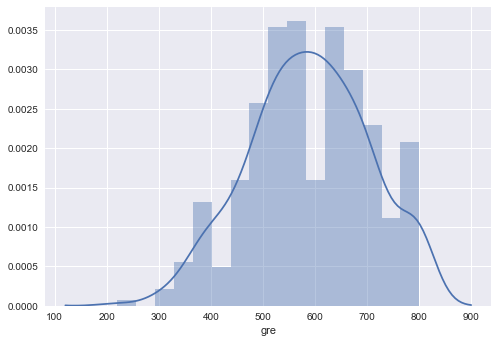

In [48]:
print sns.distplot(df['gre'])

Axes(0.125,0.125;0.775x0.755)


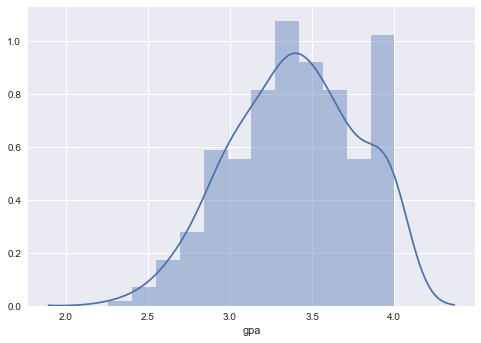

In [49]:
print sns.distplot(df['gpa'])

Axes(0.125,0.125;0.775x0.755)


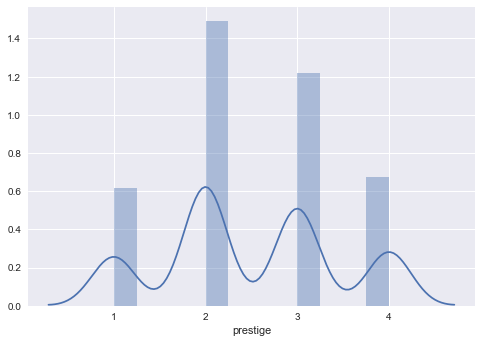

In [50]:
print sns.distplot(df['prestige'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. The linear and logistic regression (and maybe others)  models work with the assumption that the data set is a Normal Distribution. Transform the data.

#### Question 11. Which of our variables are potentially colinear? 

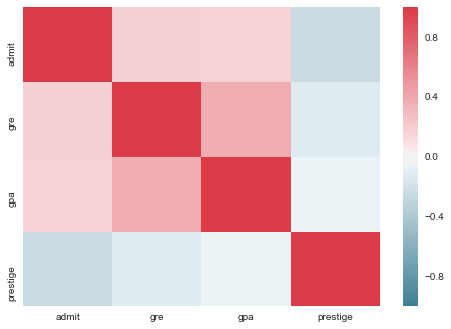

In [83]:
# create a correlation matrix for the data
#sns.heatmap(df.corr(), vmax=1., square=False).xaxis.tick_top()
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

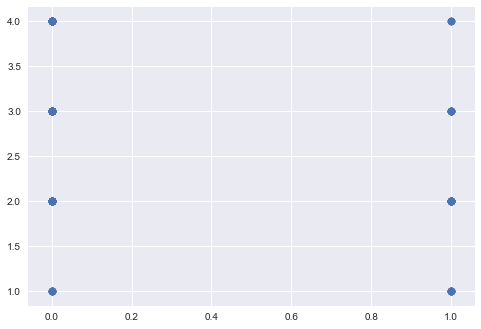

In [80]:
plt.scatter(df['admit'],df['prestige'])
plt.show()

#### Question 12. What did you find?

Answer: gre and gpa are show as colinear with a co-efficient of around 0.4.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Use a visual scatter plot of 'admit' and 'prestige' to determine this association. Alternatively use a Logistic Regression Model to determine the unknown co-efficients of the dependent ( 'admit' ) and the independent variable ( 'prestige' )

#### Question 14. What is your hypothesis? 

Answer: 'gre' and 'gpa' have a higher correlation to the observed response as compared to 'prestige'

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
One alternative to dropping observations with missing values is to impute missing values where we replace missing values with sensible values ( mean or other.. )

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data